## Theory

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1
k = h**2
mu = 1
r = h**2/(mu*k)

th = np.linspace(0, 2*np.pi, 100)
b = r*(np.cos(th) - 1)

plt.plot(th, b, label=r"$\beta(\theta)$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\beta(\theta)$")
plt.legend()
plt.grid()
plt.show()



In [ ]:
N = 5
S = [(n, m) for n in range(N) for m in range(N)]
print(f"Length of S: {len(S)}")
print("First few elements:", S[:5])


---

## SIR Model


[[1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


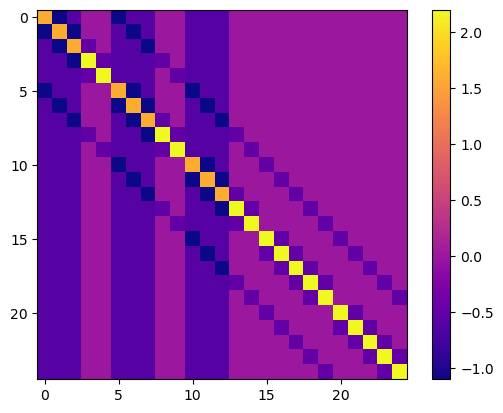

In [194]:
from scipy.sparse import diags, eye, kron

def laplacian(m, n=None):
    if n == None:
        n = m
        
    C_m = diags([-1, 2, -1], [-1, 0, 1], shape=(m, m))
    C_n = diags([-1, 2, -1], [-1, 0, 1], shape=(n, n))

    I_m = eye(m)
    I_n = eye(n)

    D = kron(C_n, I_m) + kron(I_n, C_m)
    return D

M = 5
h = 1/M
beta = 3.0
mu_s = 0.1
mu_i = 0.50

I = np.zeros((M, M))
# Set the initial condition: bottom left corner is 1, rest are 0
I[:3, :3] = 1
print(I)


dS = laplacian(M)

S = eye(M**2)
SI = eye(M**2).dot(I.flatten())

S_nxt = h*S - h*beta*SI + mu_s/h * dS

plt.imshow(S_nxt.tolist(), cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.show()
# So

[[2. 2. 2. ... 0. 0. 0.]
 [2. 2. 2. ... 0. 0. 0.]
 [2. 2. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (50, 50)
[[2. 2. 2. ... 0. 0. 0.]
 [2. 2. 2. ... 0. 0. 0.]
 [2. 2. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (50, 50)


/var/folders/ln/kg8qyxx52059p3bjyg6mllf40000gn/T/ipykernel_49647/3814614322.py:33: RuntimeWarning: overflow encountered in multiply
  dS = -self.beta * (self.S * self.I) + self.mu_s * self.L.dot(S_flat).reshape(self.M, self.M)
/var/folders/ln/kg8qyxx52059p3bjyg6mllf40000gn/T/ipykernel_49647/3814614322.py:34: RuntimeWarning: overflow encountered in multiply
  dI = self.beta * (self.S * self.I) - self.gamma * self.I + self.mu_i * self.L.dot(I_flat).reshape(self.M, self.M)
/var/folders/ln/kg8qyxx52059p3bjyg6mllf40000gn/T/ipykernel_49647/3814614322.py:33: RuntimeWarning: invalid value encountered in add
  dS = -self.beta * (self.S * self.I) + self.mu_s * self.L.dot(S_flat).reshape(self.M, self.M)
/var/folders/ln/kg8qyxx52059p3bjyg6mllf40000gn/T/ipykernel_49647/3814614322.py:34: RuntimeWarning: invalid value encountered in subtract
  dI = self.beta * (self.S * self.I) - self.gamma * self.I + self.mu_i * self.L.dot(I_flat).reshape(self.M, self.M)
/var/folders/ln/kg8qyxx52059p3bjyg6mllf40000g

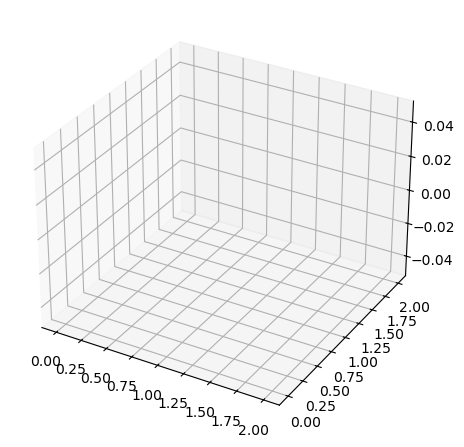

In [ ]:
import numpy as np
from scipy.sparse import diags, eye, kron
import matplotlib.pyplot as plt

class SIRPDE:
    def __init__(self, M=50, dt=0.001, T=0.1, beta=3.0, gamma=0.1, mu_s=0.1, mu_i=0.5):
        self.M = M
        self.dt = dt
        self.nsteps = int(T / dt)
        self.beta = beta
        self.gamma = gamma
        self.mu_s = mu_s
        self.mu_i = mu_i
        self.h = 1.0 / M
        self.L = self._build_laplacian(M)
        self.L *= 1.0 / (self.h**2)
        self.S = np.ones((M, M))
        self.I = np.zeros((M, M))
        self.I[:10, :10] = 2
        print(self.I, self.I.shape)

    def _build_laplacian(self, m):
        c = diags([-1, 2, -1], [-1, 0, 1], shape=(m, m))
        I_m = eye(m)
        return kron(c, I_m) + kron(I_m, c)

    def _step(self):
        # Reshape 2D arrays to 1D for matrix multiplication
        S_flat = self.S.flatten()
        I_flat = self.I.flatten()
        
        # Calculate changes using flattened arrays
        dS = -self.beta * (self.S * self.I) + self.mu_s * self.L.dot(S_flat).reshape(self.M, self.M)
        dI = self.beta * (self.S * self.I) - self.gamma * self.I + self.mu_i * self.L.dot(I_flat).reshape(self.M, self.M)
        
        # Update states
        self.S += self.dt * dS
        self.I += self.dt * dI

    def solve(self):
        for _ in range(self.nsteps):
            self._step()
        return self.S, self.I



M = 50
mu_s = 0.1
mu_i = 10
beta = 1.5
gamma = 1
h = 1/M
T = 0.1

solver = SIRPDE(M, dt=h, T=T, beta=beta, gamma=gamma, mu_s=mu_s, mu_i=mu_i)

S_list = []
I_list = []

solver = SIRPDE(M=50, dt=0.0005, T=0.05, beta=3.0, mu_s=0.1, mu_i=0.5)

x = np.linspace(0,2,solver.M)
y = np.linspace(0,2,solver.M)
X, Y = np.meshgrid(x, y)
X, Y = X.T, Y.T

for i in range(solver.nsteps):
    solver._step()
    S_list.append(solver.S)
    I_list.append(solver.I)
    

